<a href="https://colab.research.google.com/github/samvaadi/Repository_1/blob/main/Pennylane_optimising_the_circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt



In [ ]:
dev = qml.device('lightning.qubit',wires=1)

@qml.qnode(dev)
def circuit(theta):
  qml.PauliX(wires=0)
  qml.RY(theta,wires=0)
  return qml.expval(qml.PauliZ(0))

circuit(0.1)

-0.9950041652780258

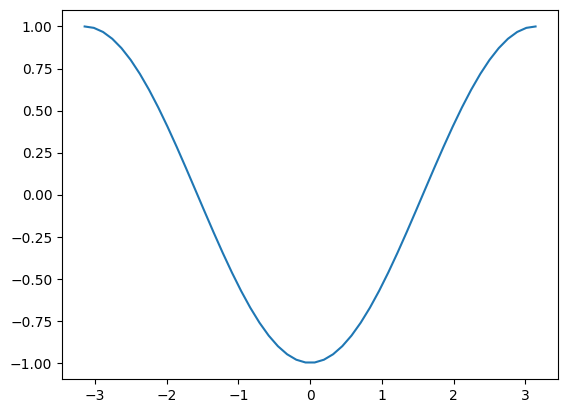

In [ ]:
thetas = np.linspace(-np.pi,np.pi,50)
measurements=[]
for theta in thetas:
  measurements.append(circuit(theta))

fig,ax = plt.subplots()
ax.plot(thetas,measurements)

#plt.plot(thetas,measurements)
#plt.show()

In [ ]:
theta = np.array([-2.0],requires_grad=True)
opt = qml.GradientDescentOptimizer(stepsize=0.1)


In [ ]:
n_it = 100
for i in range(n_it):
    theta, prev_cost = opt.step_and_cost(circuit, theta)
    if i % 10 == 0:
        print('Theta:', theta, 'Cost:', circuit(theta))

Theta: [-1.90907026] Cost: [0.33185934]
Theta: [-0.95268251] Cost: [-0.579499]
Theta: [-0.35999832] Cost: [-0.93589741]
Theta: [-0.12693105] Cost: [-0.99195506]
Theta: [-0.04431925] Cost: [-0.99901806]
Theta: [-0.01545577] Cost: [-0.99988056]
Theta: [-0.0053892] Cost: [-0.99998548]
Theta: [-0.0018791] Cost: [-0.99999823]
Theta: [-0.0006552] Cost: [-0.99999979]
Theta: [-0.00022846] Cost: [-0.99999997]
